In [1]:
pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.6 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import matplotlib.pyplot as plt
from google.colab import files

In [3]:
# Unggah dataset
uploaded = files.upload()

Saving dataset_tempat_wisata_malang.csv to dataset_tempat_wisata_malang.csv


In [4]:
# Load dataset
data = pd.read_csv("dataset_tempat_wisata_malang.csv", sep=";")

# Preprocessing
stopword_factory = StopWordRemoverFactory()
stopword_remover = stopword_factory.create_stop_word_remover()

def preprocess_text(text):
    if pd.isnull(text):
        return ""
    return stopword_remover.remove(text.lower())

# Combine features and preprocess
data['combined_features'] = data['name'] + " " + data['category'] + " " + data['description']
data['combined_features'] = data['combined_features'].apply(preprocess_text)

# Vectorize using TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data['combined_features'])

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix)

In [6]:
# Prepare data for training
pairs = []
scores = []
for i in range(len(cosine_sim)):
    for j in range(len(cosine_sim)):
        if i != j:  # Avoid self-comparison
            pairs.append((tfidf_matrix[i].toarray().flatten(), tfidf_matrix[j].toarray().flatten()))
            scores.append(cosine_sim[i, j])

# Convert to numpy arrays
pairs_array = [np.concatenate(pair) for pair in pairs]
scores_array = np.array(scores)

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(pairs_array, scores_array, test_size=0.2, random_state=42)

# Convert to TensorFlow tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

# Build TensorFlow model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.summary()
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         368,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 377,089 (1.44 MB)

 Trainable params: 377,089 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.0023 - mae: 0.0293 - val_loss: 0.0012 - val_mae: 0.0213
Epoch 2/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0010 - mae: 0.0202 - val_loss: 9.6523e-04 - val_mae: 0.0195
Epoch 3/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 7.1386e-04 - mae: 0.0172 - val_loss: 8.9657e-04 - val_mae: 0.0187
Epoch 4/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 5.7644e-04 - mae: 0.0158 - val_loss: 8.4149e-04 - val_mae: 0.0189
Epoch 5/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 4.6497e-04 - mae: 0.0145 - val_loss: 7.4872e-04 - val_mae: 0.0179
Epoch 6/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 3.8054e-04 - mae: 0.0133 - val_loss: 7.4222e-04 - val_mae: 0.0174
Epoch 7/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 3.2521e-04 - mae: 0.0124 - val_loss: 7.6931e-04 - val_mae: 0.0181
Epoch 8/10
995/995 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 2.8666e-04 - mae: 0.0118 - val_loss: 7.2745e-04 - val_mae: 0.017

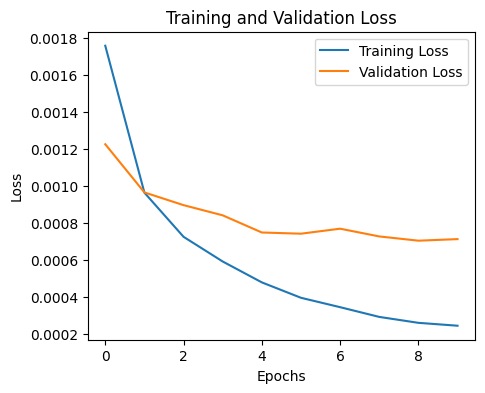

In [7]:
# Plot the training and validation loss
plt.figure(figsize=(5, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [8]:
# Example usage
def predict_relevance(input_features):
    input_vector = tfidf.transform([preprocess_text(input_features)]).toarray().flatten()
    recommendations = []

    for idx in range(len(data)):
        place_vector = tfidf_matrix[idx].toarray().flatten()
        combined_vector = np.concatenate((input_vector, place_vector))
        combined_vector = tf.convert_to_tensor([combined_vector], dtype=tf.float32)

        # Predict the score
        predicted_score = model.predict(combined_vector)[0][0]
        recommendations.append((data.iloc[idx]['name'], data.iloc[idx]['description'], predicted_score))

    # Sort by predicted score in descending order
    recommendations = sorted(recommendations, key=lambda x: x[2], reverse=True)
    return recommendations


In [9]:
# Example prediction
example_input = "Wisata Air"
predicted_scores = predict_relevance(example_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━

In [10]:
# Display recommendations
print("Rekomendasi tempat wisata serupa:")
for name, description, score in predicted_scores[:10]:  # Display top 10
    print(f"Nama: {name}, Deskripsi: {description}, Predicted Score: {score}")

Rekomendasi tempat wisata serupa:
Nama: Wisata sumber suceng, Deskripsi: Mata air alami yang dikenal dengan airnya yang jernih dan sejuk, serta suasana alam yang tenang dan menyegarkan, Predicted Score: 0.3038003742694855
Nama: Mata Air Wendit Lanang, Deskripsi: Mata air ini merupakan sumber air alami yang sering dikunjungi oleh masyarakat sekitar. Biasanya, tempat seperti ini memiliki suasana yang tenang dan asri, cocok untuk kamu yang ingin melepas penat., Predicted Score: 0.24464726448059082
Nama: SUMBER UMBULAN LOWOKSARI, Deskripsi: Dikenal dengan air mata airnya yang jernih dan segar, serta pemandangan alam yang menenangkan, Predicted Score: 0.1910208910703659
Nama: Coban Glotak, Deskripsi: Sebuah air terjun yang dikenal dengan pemandangan alamnya yang menakjubkan dan suasana yang masih alami, Predicted Score: 0.18644489347934723
Nama: Taman Air NAHELOP, Deskripsi: Taman air yang terletak di Kota Malang, Jawa Timur. Taman ini menawarkan berbagai fasilitas rekreasi dan hiburan untu

In [ ]:
# Save the model
model.save('recommender_model.h5')

In [ ]:
# Asumsikan model Anda adalah model yang telah dilatih
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model TFLite
with open('model_malang.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpg0fubl5i'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 2880), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134675415947344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134675415946288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134675415950160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134675415948752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134675415944528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134675415951216: TensorSpec(shape=(), dtype=tf.resource, name=None)
